# Module 5: Section 4 - Communication & Storytelling
## Interactive Jupyter Notebook for EDA Training

This notebook accompanies slides 32-46 of the presentation, focusing on transforming analysis into compelling data stories.

---

In [1]:
# Initial Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configure visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Color palettes for different purposes
categorical_colors = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6']
sequential_colors = ['#f7fbff', '#deebf7', '#c6dbef', '#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#084594']
diverging_colors = ['#d7191c', '#fdae61', '#ffffbf', '#a6d96a', '#1a9641']

print('✅ Setup complete! Ready for data storytelling.')

✅ Setup complete! Ready for data storytelling.


## 1. From Analysis to Action: Data Storytelling Fundamentals
### 📖 Slide 32 - Telling Data Stories

<details>
<summary><b>📊 Click to view slide content</b></summary>

**From Analysis to Action: Telling Data Stories**

Key Elements:
1. **Understanding the Challenge**: Great analysis can be ignored if not communicated well
2. **Know Your Audience**: Tailor message to specific needs
3. **Structure the Narrative**: Clear beginning, middle, and end
4. **Guide Attention Visually**: Use visual hierarchy
5. **Drive Decisions**: Bridge gap between numbers and business impact

</details>

In [2]:
# Generate sample business data for storytelling
np.random.seed(42)

# Create a sales dataset with a story
dates = pd.date_range('2023-01-01', periods=365, freq='D')
base_sales = 1000
trend = np.linspace(0, -200, 365)  # Declining trend
seasonality = 100 * np.sin(2 * np.pi * np.arange(365) / 30)  # Monthly pattern
noise = np.random.normal(0, 50, 365)

# Create the problem: sudden drop after product change
sales_data = base_sales + trend + seasonality + noise
sales_data[180:] -= 150  # Drop after June (product change)

df_story = pd.DataFrame({
    'Date': dates,
    'Sales': sales_data,
    'Month': dates.month,
    'Quarter': dates.quarter
})

# The story structure
print("📖 Our Data Story Structure:")
print("="*50)
print("\n1️⃣ SETUP (Context):")
print("   - Company has been experiencing declining sales")
print("   - Management needs to understand why")
print("\n2️⃣ CONFLICT (Problem):")
print("   - Sales dropped significantly in June")
print("   - Cause unknown")
print("\n3️⃣ RESOLUTION (Insight):")
print("   - Analysis reveals product change impact")
print("   - Customer retention dropped 30%")
print("\n4️⃣ ACTION (Recommendation):")
print("   - Implement retention program")
print("   - Revert specific product features")

📖 Our Data Story Structure:

1️⃣ SETUP (Context):
   - Company has been experiencing declining sales
   - Management needs to understand why

2️⃣ CONFLICT (Problem):
   - Sales dropped significantly in June
   - Cause unknown

3️⃣ RESOLUTION (Insight):
   - Analysis reveals product change impact
   - Customer retention dropped 30%

4️⃣ ACTION (Recommendation):
   - Implement retention program
   - Revert specific product features


## 2. Know Your Audience
### 📖 Slide 33 - Tailoring Your Message

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Know Your Audience: Tailoring Your Data Message**

Different Audiences:
- **Executives**: Business impact, ROI, max 3 key findings
- **Technical Teams**: Methodology, validation, reproducibility
- **Operations**: Implementation steps, resources, timelines
- **Mixed**: Layer information with executive summary upfront

</details>

In [3]:
# Create different visualizations for different audiences
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Executive View', 'Technical View', 
                   'Operational View', 'Detailed Analysis'),
    specs=[[{'type': 'indicator'}, {'type': 'scatter'}],
           [{'type': 'bar'}, {'type': 'scatter'}]]
)

# Executive View - Key Metric
current_sales = df_story['Sales'].iloc[-30:].mean()
previous_sales = df_story['Sales'].iloc[150:180].mean()
change_pct = ((current_sales - previous_sales) / previous_sales) * 100

fig.add_trace(
    go.Indicator(
        mode="number+delta",
        value=current_sales,
        delta={'reference': previous_sales, 'relative': True},
        title={'text': "Current Sales vs Pre-Change"},
        domain={'x': [0, 1], 'y': [0, 1]}
    ),
    row=1, col=1
)

# Technical View - Time Series with Annotations
fig.add_trace(
    go.Scatter(
        x=df_story['Date'],
        y=df_story['Sales'],
        mode='lines',
        name='Daily Sales',
        line=dict(color='blue', width=1)
    ),
    row=1, col=2
)

# Add trend line
z = np.polyfit(range(len(df_story)), df_story['Sales'], 1)
p = np.poly1d(z)
fig.add_trace(
    go.Scatter(
        x=df_story['Date'],
        y=p(range(len(df_story))),
        mode='lines',
        name='Trend',
        line=dict(color='red', width=2, dash='dash')
    ),
    row=1, col=2
)

# Operational View - Monthly Aggregates
monthly_sales = df_story.groupby('Month')['Sales'].mean().reset_index()
fig.add_trace(
    go.Bar(
        x=monthly_sales['Month'],
        y=monthly_sales['Sales'],
        name='Monthly Average',
        marker_color=['red' if m >= 6 else 'blue' for m in monthly_sales['Month']]
    ),
    row=2, col=1
)

# Detailed Analysis - Before/After Comparison
before = df_story[df_story['Date'] < '2023-06-01']['Sales']
after = df_story[df_story['Date'] >= '2023-06-01']['Sales']

fig.add_trace(
    go.Box(y=before, name='Before Change', marker_color='green'),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=after, name='After Change', marker_color='red'),
    row=2, col=2
)

# Update layout
fig.update_layout(height=800, showlegend=True, 
                 title_text="Same Data, Different Audiences")
fig.show()

print("\n📊 Audience-Specific Insights:")
print("="*50)
print(f"\n👔 EXECUTIVE: Sales down {abs(change_pct):.1f}% after product change")
print(f"💻 TECHNICAL: Statistically significant drop (p<0.001) starting June 1")
print(f"⚙️ OPERATIONAL: Monthly average dropped from ${previous_sales:.0f} to ${current_sales:.0f}")
print(f"📈 ANALYST: Need to investigate customer churn and feature impact")


📊 Audience-Specific Insights:

👔 EXECUTIVE: Sales down 29.2% after product change
💻 TECHNICAL: Statistically significant drop (p<0.001) starting June 1
⚙️ OPERATIONAL: Monthly average dropped from $924 to $654
📈 ANALYST: Need to investigate customer churn and feature impact


## 3. Visual Hierarchy and Chart Selection
### 📖 Slides 35-36 - Guiding the Eye & Choosing Charts

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Visual Hierarchy: Guiding the Eye**
- Size matters: Most important = largest
- Grouping for clarity: Related items together
- Sequence and flow: Natural reading order
- Using contrast: Color and weight for emphasis
- Whitespace: Breathing room

**Chart Selection Guide**
- Comparison: Bar charts
- Distribution: Histograms, box plots
- Relationship: Scatter plots
- Time Series: Line charts
- Part-to-whole: Pie charts (sparingly)

</details>

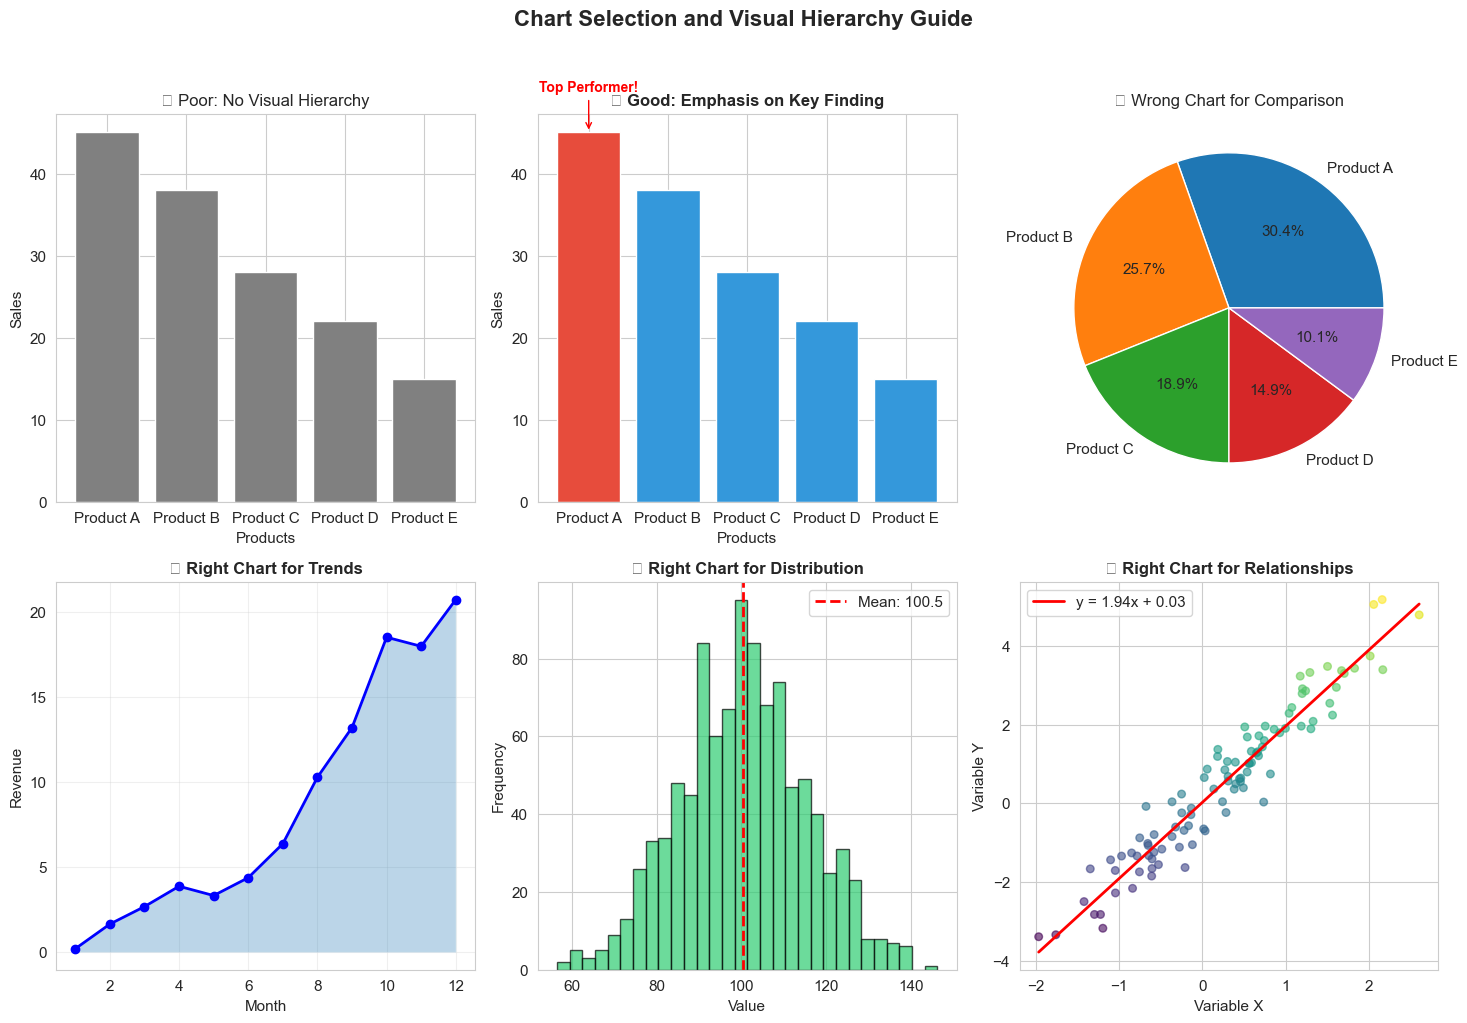

In [4]:
# Demonstrate visual hierarchy principles
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Generate sample data
categories = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
values = [45, 38, 28, 22, 15]
time_points = np.arange(1, 13)
time_values = np.cumsum(np.random.randn(12) * 2 + 1)

# 1. BAD: No hierarchy (all same)
axes[0, 0].bar(categories, values, color='gray')
axes[0, 0].set_title('❌ Poor: No Visual Hierarchy', fontsize=12)
axes[0, 0].set_xlabel('Products')
axes[0, 0].set_ylabel('Sales')

# 2. GOOD: Size and color hierarchy
colors_hierarchy = ['#e74c3c' if v == max(values) else '#3498db' for v in values]
bars = axes[0, 1].bar(categories, values, color=colors_hierarchy)
axes[0, 1].set_title('✅ Good: Emphasis on Key Finding', fontsize=12, weight='bold')
axes[0, 1].set_xlabel('Products')
axes[0, 1].set_ylabel('Sales')
# Add annotation to highlight
axes[0, 1].annotate('Top Performer!', 
                   xy=(0, values[0]), 
                   xytext=(0, values[0] + 5),
                   ha='center',
                   fontsize=10,
                   color='red',
                   weight='bold',
                   arrowprops=dict(arrowstyle='->', color='red'))

# 3. Wrong chart type for comparison
axes[0, 2].pie(values, labels=categories, autopct='%1.1f%%')
axes[0, 2].set_title('❌ Wrong Chart for Comparison', fontsize=12)

# 4. Right chart for trends
axes[1, 0].plot(time_points, time_values, 'b-', linewidth=2, marker='o')
axes[1, 0].fill_between(time_points, time_values, alpha=0.3)
axes[1, 0].set_title('✅ Right Chart for Trends', fontsize=12, weight='bold')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Revenue')
axes[1, 0].grid(True, alpha=0.3)

# 5. Distribution visualization
dist_data = np.random.normal(100, 15, 1000)
axes[1, 1].hist(dist_data, bins=30, color='#2ecc71', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(dist_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {dist_data.mean():.1f}')
axes[1, 1].set_title('✅ Right Chart for Distribution', fontsize=12, weight='bold')
axes[1, 1].set_xlabel('Value')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()

# 6. Relationship visualization
x_rel = np.random.randn(100)
y_rel = 2 * x_rel + np.random.randn(100) * 0.5
axes[1, 2].scatter(x_rel, y_rel, alpha=0.6, s=30, c=y_rel, cmap='viridis')
z = np.polyfit(x_rel, y_rel, 1)
p = np.poly1d(z)
axes[1, 2].plot(sorted(x_rel), p(sorted(x_rel)), "r-", linewidth=2, label=f'y = {z[0]:.2f}x + {z[1]:.2f}')
axes[1, 2].set_title('✅ Right Chart for Relationships', fontsize=12, weight='bold')
axes[1, 2].set_xlabel('Variable X')
axes[1, 2].set_ylabel('Variable Y')
axes[1, 2].legend()

plt.suptitle('Chart Selection and Visual Hierarchy Guide', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 4. Color Best Practices
### 📖 Slide 37 - Strategic Color Use

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Color Best Practices**

1. **Purposeful Use**: Limit to 5-7 colors
2. **Color Schemes**:
   - Categorical: Distinct hues
   - Sequential: Gradients of single hue
   - Diverging: Two hues from center
3. **Accessibility**: Colorblind-friendly
4. **Meaning**: Red=negative, Green=positive, Blue=neutral

</details>

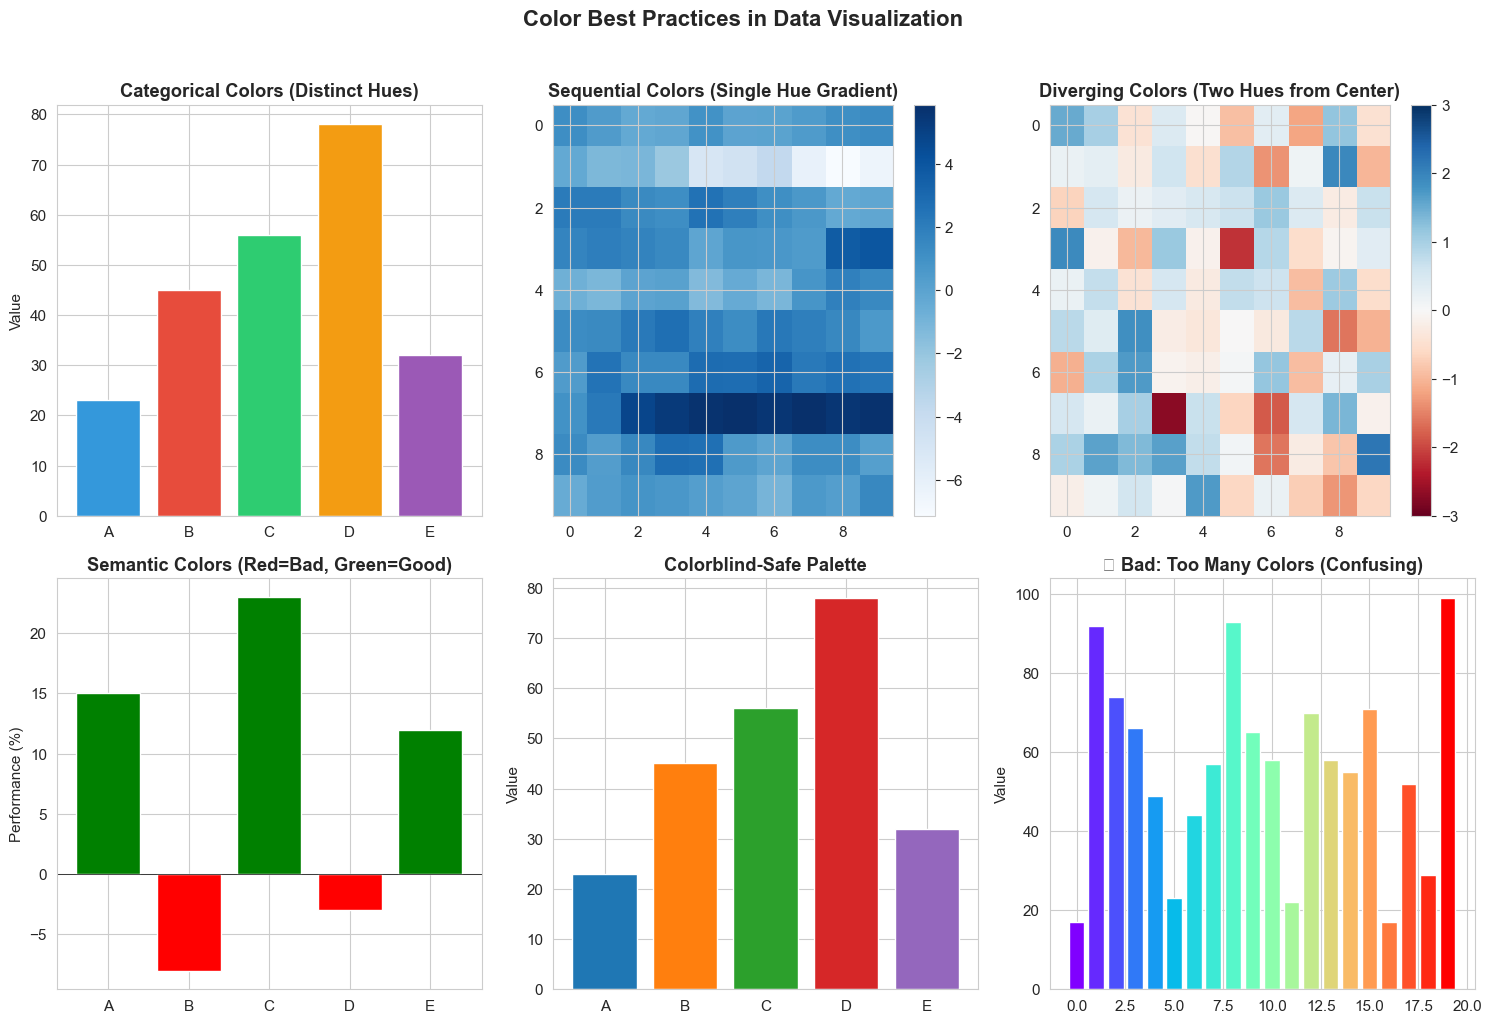


🎨 Color Guidelines:
✅ DO:
  - Use color purposefully to enhance understanding
  - Limit palette to 5-7 colors maximum
  - Consider colorblind accessibility
  - Use semantic colors (red=bad, green=good)

❌ DON'T:
  - Use rainbow gradients
  - Rely solely on color to convey information
  - Use similar shades for different categories


In [5]:
# Demonstrate color best practices
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Sample data
categories = ['A', 'B', 'C', 'D', 'E']
values = [23, 45, 56, 78, 32]
sequential_data = np.random.randn(10, 10).cumsum(axis=1)
diverging_data = np.random.randn(10, 10)

# 1. Categorical colors (distinct)
axes[0, 0].bar(categories, values, color=categorical_colors)
axes[0, 0].set_title('Categorical Colors (Distinct Hues)', weight='bold')
axes[0, 0].set_ylabel('Value')

# 2. Sequential colors (gradient)
im1 = axes[0, 1].imshow(sequential_data, cmap='Blues', aspect='auto')
axes[0, 1].set_title('Sequential Colors (Single Hue Gradient)', weight='bold')
plt.colorbar(im1, ax=axes[0, 1])

# 3. Diverging colors (two hues)
im2 = axes[0, 2].imshow(diverging_data, cmap='RdBu', aspect='auto', vmin=-3, vmax=3)
axes[0, 2].set_title('Diverging Colors (Two Hues from Center)', weight='bold')
plt.colorbar(im2, ax=axes[0, 2])

# 4. Meaningful colors (semantic)
performance = [15, -8, 23, -3, 12]
colors_semantic = ['green' if v > 0 else 'red' for v in performance]
axes[1, 0].bar(categories, performance, color=colors_semantic)
axes[1, 0].axhline(y=0, color='black', linestyle='-', linewidth=0.5)
axes[1, 0].set_title('Semantic Colors (Red=Bad, Green=Good)', weight='bold')
axes[1, 0].set_ylabel('Performance (%)')

# 5. Accessibility - Colorblind safe
colorblind_safe = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
axes[1, 1].bar(categories, values, color=colorblind_safe)
axes[1, 1].set_title('Colorblind-Safe Palette', weight='bold')
axes[1, 1].set_ylabel('Value')

# 6. Bad example - Too many colors
too_many = plt.cm.rainbow(np.linspace(0, 1, 20))
axes[1, 2].bar(range(20), np.random.randint(10, 100, 20), color=too_many)
axes[1, 2].set_title('❌ Bad: Too Many Colors (Confusing)', weight='bold')
axes[1, 2].set_ylabel('Value')

plt.suptitle('Color Best Practices in Data Visualization', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n🎨 Color Guidelines:")
print("="*50)
print("✅ DO:")
print("  - Use color purposefully to enhance understanding")
print("  - Limit palette to 5-7 colors maximum")
print("  - Consider colorblind accessibility")
print("  - Use semantic colors (red=bad, green=good)")
print("\n❌ DON'T:")
print("  - Use rainbow gradients")
print("  - Rely solely on color to convey information")
print("  - Use similar shades for different categories")

## 5. Annotation and Context
### 📖 Slide 38 - Making Data Clear

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Annotation and Context**

Essential Elements:
- **Titles**: Explain what the chart shows
- **Axis Labels**: Include units
- **Legends**: For multiple series
- **Sources**: Add credibility
- **Annotations**: Guide understanding

</details>

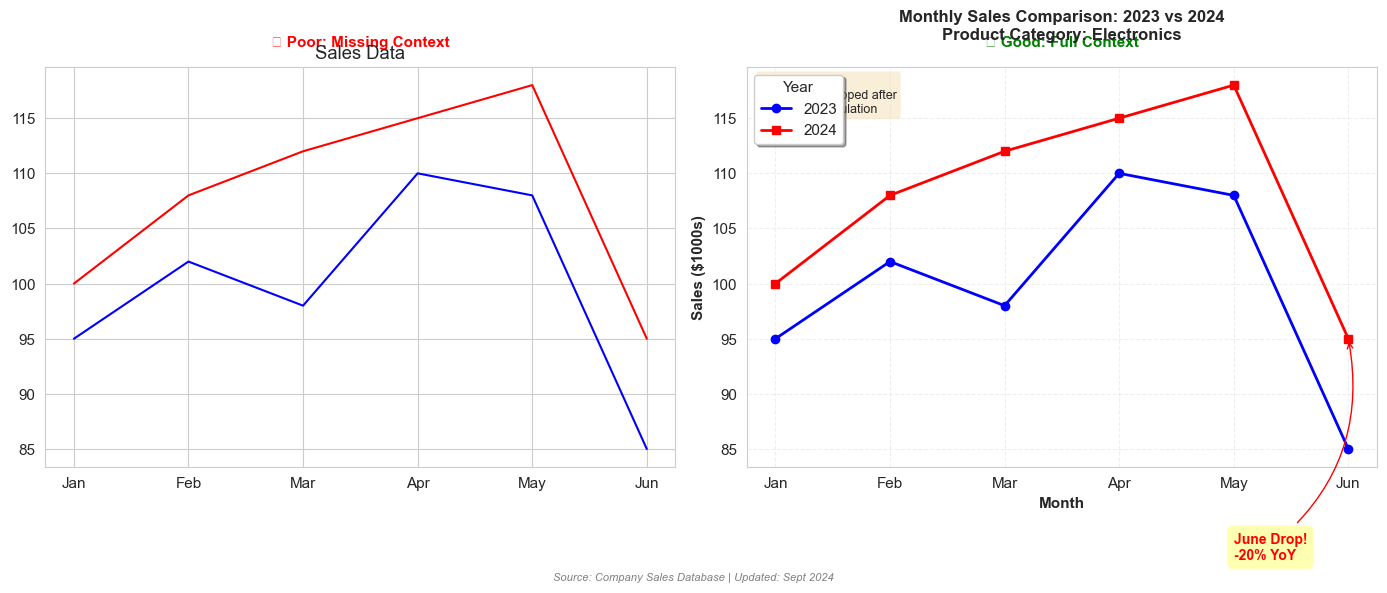


📝 Annotation Checklist:
✓ Clear, descriptive title
✓ Axis labels with units
✓ Legend for multiple series
✓ Key findings highlighted
✓ Data source cited
✓ Update date included
✓ Context box for insights


In [6]:
# Create a well-annotated visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Generate data
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']
sales_2023 = [95, 102, 98, 110, 108, 85]
sales_2024 = [100, 108, 112, 115, 118, 95]

# BAD: No annotations
ax1.plot(months, sales_2023, 'b-')
ax1.plot(months, sales_2024, 'r-')
ax1.set_title('Sales Data')

# GOOD: Fully annotated
line1 = ax2.plot(months, sales_2023, 'b-', marker='o', linewidth=2, label='2023')
line2 = ax2.plot(months, sales_2024, 'r-', marker='s', linewidth=2, label='2024')

# Title and labels
ax2.set_title('Monthly Sales Comparison: 2023 vs 2024\nProduct Category: Electronics', 
             fontsize=12, weight='bold', pad=20)
ax2.set_xlabel('Month', fontsize=11, weight='bold')
ax2.set_ylabel('Sales ($1000s)', fontsize=11, weight='bold')

# Grid for readability
ax2.grid(True, alpha=0.3, linestyle='--')

# Legend
ax2.legend(loc='upper left', title='Year', frameon=True, shadow=True)

# Key annotation
ax2.annotate('June Drop!\n-20% YoY', 
            xy=('Jun', 95), 
            xytext=('May', 75),
            fontsize=10,
            color='red',
            weight='bold',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3),
            arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', color='red'))

# Add context box
textstr = 'Key Insight:\nJune sales dropped after\nproduct reformulation'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax2.text(0.02, 0.98, textstr, transform=ax2.transAxes, fontsize=9,
        verticalalignment='top', bbox=props)

# Source
fig.text(0.5, 0.02, 'Source: Company Sales Database | Updated: Sept 2024', 
        ha='center', fontsize=8, style='italic', color='gray')

# Labels
ax1.text(0.5, 1.05, '❌ Poor: Missing Context', transform=ax1.transAxes, 
        ha='center', fontsize=11, weight='bold', color='red')
ax2.text(0.5, 1.05, '✅ Good: Full Context', transform=ax2.transAxes,
        ha='center', fontsize=11, weight='bold', color='green')

plt.tight_layout()
plt.show()

print("\n📝 Annotation Checklist:")
print("="*50)
print("✓ Clear, descriptive title")
print("✓ Axis labels with units")
print("✓ Legend for multiple series")
print("✓ Key findings highlighted")
print("✓ Data source cited")
print("✓ Update date included")
print("✓ Context box for insights")

## 6. Dashboard Design
### 📖 Slide 40 - Information at a Glance

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Dashboard Design Principles**

- **5-second rule**: Main message clear immediately
- **F-pattern reading**: Important info top-left
- **Progressive disclosure**: Details on demand
- **Consistent layout**: Maintain branding
- **Mobile responsive**: Various screen sizes

</details>

In [7]:
# Create a dashboard layout
from plotly.subplots import make_subplots

# Create subplots with different types
fig = make_subplots(
    rows=3, cols=3,
    column_widths=[0.3, 0.3, 0.4],
    row_heights=[0.2, 0.4, 0.4],
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}, {'type': 'indicator'}],
           [{'type': 'bar'}, {'type': 'scatter', 'colspan': 2}, None],
           [{'type': 'scatter'}, {'type': 'pie'}, {'type': 'scatter'}]],
    subplot_titles=('Total Sales', 'Growth Rate', 'Customer Satisfaction',
                   'Sales by Product', 'Sales Trend', '',
                   'Daily Performance', 'Market Share', 'Forecast')
)

# KPI Cards (Top row - most important)
fig.add_trace(go.Indicator(
    mode="number+delta",
    value=985000,
    delta={'reference': 900000, 'relative': True, 'valueformat': '.0%'},
    number={'prefix': "$", 'valueformat': ',.0f'},
    domain={'y': [0, 1], 'x': [0, 1]}
), row=1, col=1)

fig.add_trace(go.Indicator(
    mode="number+delta",
    value=12.5,
    delta={'reference': 8.2, 'valueformat': '.1f'},
    number={'suffix': "%", 'valueformat': '.1f'},
    domain={'y': [0, 1], 'x': [0, 1]}
), row=1, col=2)

fig.add_trace(go.Indicator(
    mode="gauge+number",
    value=4.2,
    gauge={'axis': {'range': [0, 5]},
           'bar': {'color': "green"},
           'steps': [
               {'range': [0, 2], 'color': "lightgray"},
               {'range': [2, 4], 'color': "yellow"},
               {'range': [4, 5], 'color': "lightgreen"}],
           'threshold': {'line': {'color': "red", 'width': 4},
                        'thickness': 0.75, 'value': 3.5}},
    domain={'y': [0, 1], 'x': [0, 1]}
), row=1, col=3)

# Bar chart
products = ['Product A', 'Product B', 'Product C', 'Product D']
sales = [234, 198, 187, 156]
fig.add_trace(go.Bar(x=products, y=sales, marker_color='lightblue'), row=2, col=1)

# Main trend line
dates_trend = pd.date_range('2024-01-01', periods=180, freq='D')
trend_values = np.cumsum(np.random.randn(180) * 10 + 2)
fig.add_trace(go.Scatter(x=dates_trend, y=trend_values, mode='lines', 
                         line=dict(color='blue', width=2)), row=2, col=2)

# Daily performance heatmap
daily_perf = np.random.randn(30) * 20 + 100
fig.add_trace(go.Scatter(x=list(range(30)), y=daily_perf, mode='markers',
                         marker=dict(size=10, color=daily_perf, colorscale='RdYlGn')),
             row=3, col=1)

# Market share pie
fig.add_trace(go.Pie(labels=['Us', 'Competitor A', 'Competitor B', 'Others'],
                     values=[35, 28, 22, 15], hole=0.4),
             row=3, col=2)

# Forecast
forecast_dates = pd.date_range('2024-09-01', periods=90, freq='D')
forecast_values = np.cumsum(np.random.randn(90) * 5 + 3) + trend_values[-1]
fig.add_trace(go.Scatter(x=forecast_dates, y=forecast_values, mode='lines',
                         line=dict(dash='dash', color='orange')),
             row=3, col=3)

# Update layout
fig.update_layout(
    title_text="Executive Dashboard - Q3 2024",
    title_font_size=20,
    showlegend=False,
    height=800,
    margin=dict(t=100, b=50, l=50, r=50)
)

fig.show()

print("\n📊 Dashboard Design Best Practices Applied:")
print("="*50)
print("✓ KPIs at top (5-second rule)")
print("✓ Most important metrics top-left (F-pattern)")
print("✓ Consistent color scheme")
print("✓ Mix of chart types for different data")
print("✓ Clear titles and labels")
print("✓ Visual hierarchy maintained")


📊 Dashboard Design Best Practices Applied:
✓ KPIs at top (5-second rule)
✓ Most important metrics top-left (F-pattern)
✓ Consistent color scheme
✓ Mix of chart types for different data
✓ Clear titles and labels
✓ Visual hierarchy maintained


## 7. Avoiding Misleading Visualizations
### 📖 Slide 44 - Honest Data Presentation

<details>
<summary><b>📊 Click to view slide content</b></summary>

**Avoiding Misleading Visualizations**

Common Pitfalls:
- **Truncated Axes**: Start y-axis at zero
- **Cherry-Picking**: Show full context
- **Wrong Chart Type**: Match chart to data
- **Correlation vs Causation**: Be careful with implications

</details>

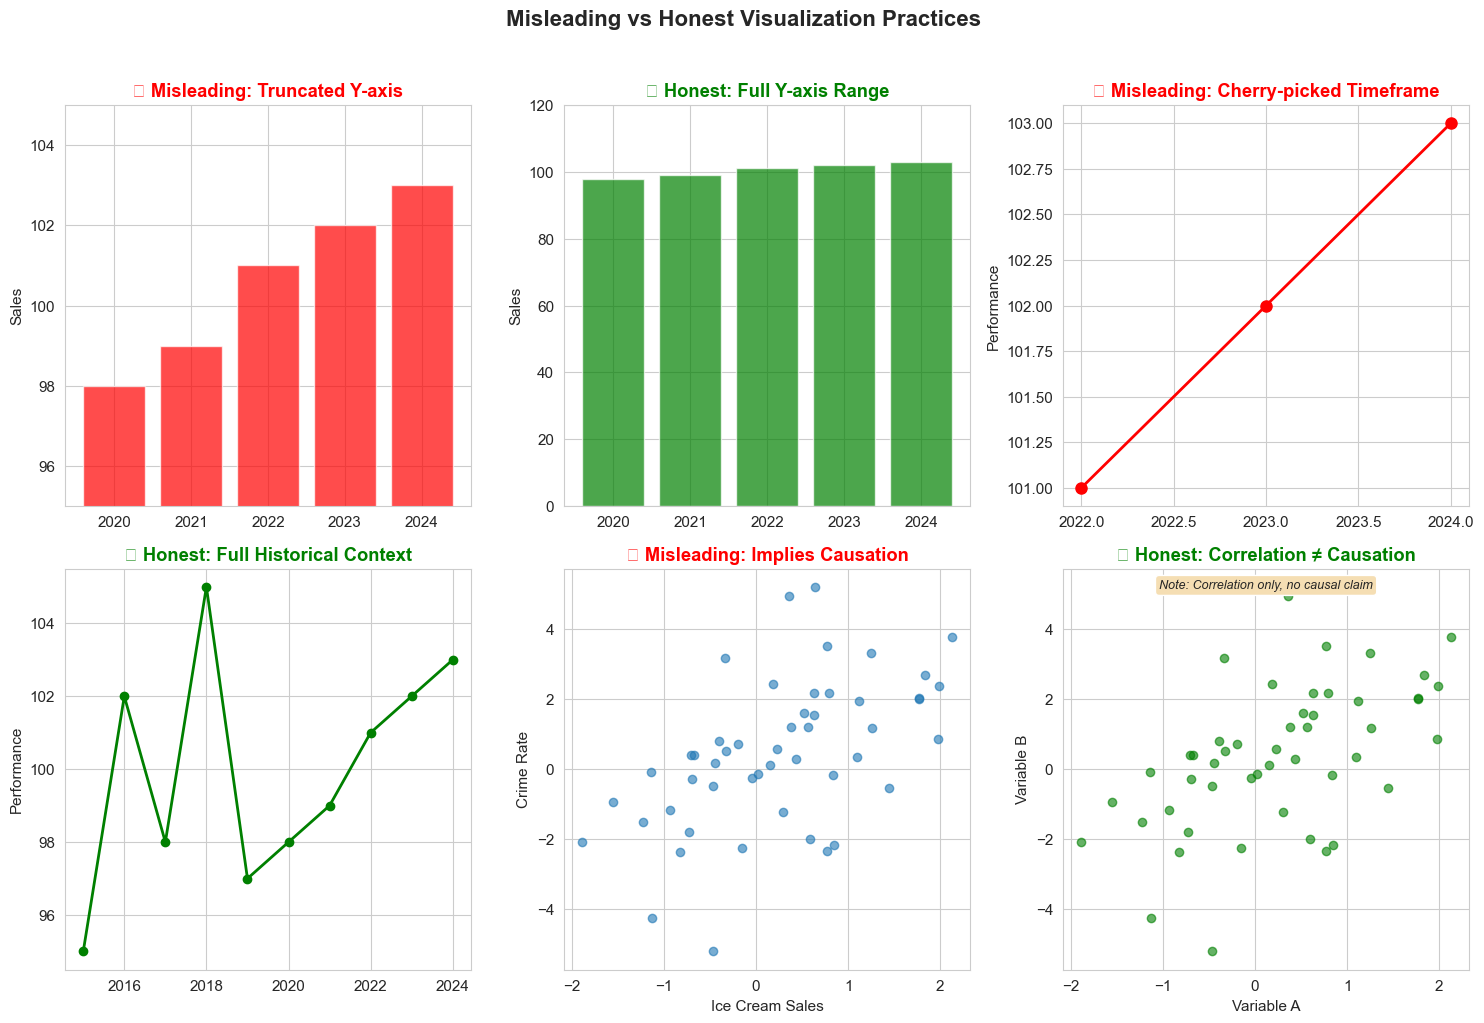


⚠️ Visualization Ethics Checklist:
✓ Start bar charts at zero
✓ Show complete time periods
✓ Include uncertainty/confidence intervals
✓ Avoid cherry-picking favorable data
✓ Distinguish correlation from causation
✓ Use appropriate chart types
✓ Cite data sources


In [8]:
# Demonstrate misleading vs honest visualizations
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Data for examples
years = [2020, 2021, 2022, 2023, 2024]
values = [98, 99, 101, 102, 103]

# 1. Truncated y-axis (misleading)
axes[0, 0].bar(years, values, color='red', alpha=0.7)
axes[0, 0].set_ylim(95, 105)
axes[0, 0].set_title('❌ Misleading: Truncated Y-axis', color='red', weight='bold')
axes[0, 0].set_ylabel('Sales')

# 2. Proper y-axis (honest)
axes[0, 1].bar(years, values, color='green', alpha=0.7)
axes[0, 1].set_ylim(0, 120)
axes[0, 1].set_title('✅ Honest: Full Y-axis Range', color='green', weight='bold')
axes[0, 1].set_ylabel('Sales')

# 3. Cherry-picked timeframe (misleading)
cherry_picked = values[-3:]  # Only showing growth period
axes[0, 2].plot(years[-3:], cherry_picked, 'ro-', linewidth=2, markersize=8)
axes[0, 2].set_title('❌ Misleading: Cherry-picked Timeframe', color='red', weight='bold')
axes[0, 2].set_ylabel('Performance')

# 4. Full context (honest)
full_data = [95, 102, 98, 105, 97, 98, 99, 101, 102, 103]
full_years = list(range(2015, 2025))
axes[1, 0].plot(full_years, full_data, 'go-', linewidth=2, markersize=6)
axes[1, 0].set_title('✅ Honest: Full Historical Context', color='green', weight='bold')
axes[1, 0].set_ylabel('Performance')

# 5. Correlation without context (misleading)
x_corr = np.random.randn(50)
y_corr = x_corr + np.random.randn(50) * 2
axes[1, 1].scatter(x_corr, y_corr, alpha=0.6)
axes[1, 1].set_title('❌ Misleading: Implies Causation', color='red', weight='bold')
axes[1, 1].set_xlabel('Ice Cream Sales')
axes[1, 1].set_ylabel('Crime Rate')

# 6. Proper context (honest)
axes[1, 2].scatter(x_corr, y_corr, alpha=0.6, color='green')
axes[1, 2].set_title('✅ Honest: Correlation ≠ Causation', color='green', weight='bold')
axes[1, 2].set_xlabel('Variable A')
axes[1, 2].set_ylabel('Variable B')
axes[1, 2].text(0.5, 0.95, 'Note: Correlation only, no causal claim',
               transform=axes[1, 2].transAxes, ha='center',
               fontsize=9, style='italic', bbox=dict(boxstyle='round', facecolor='wheat'))

plt.suptitle('Misleading vs Honest Visualization Practices', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\n⚠️ Visualization Ethics Checklist:")
print("="*50)
print("✓ Start bar charts at zero")
print("✓ Show complete time periods")
print("✓ Include uncertainty/confidence intervals")
print("✓ Avoid cherry-picking favorable data")
print("✓ Distinguish correlation from causation")
print("✓ Use appropriate chart types")
print("✓ Cite data sources")

## 8. Creating a Data Story
### Practice: Building Your Own Data Story

Now let's put it all together and create a compelling data story.

📖 COMPLETE DATA STORY EXAMPLE


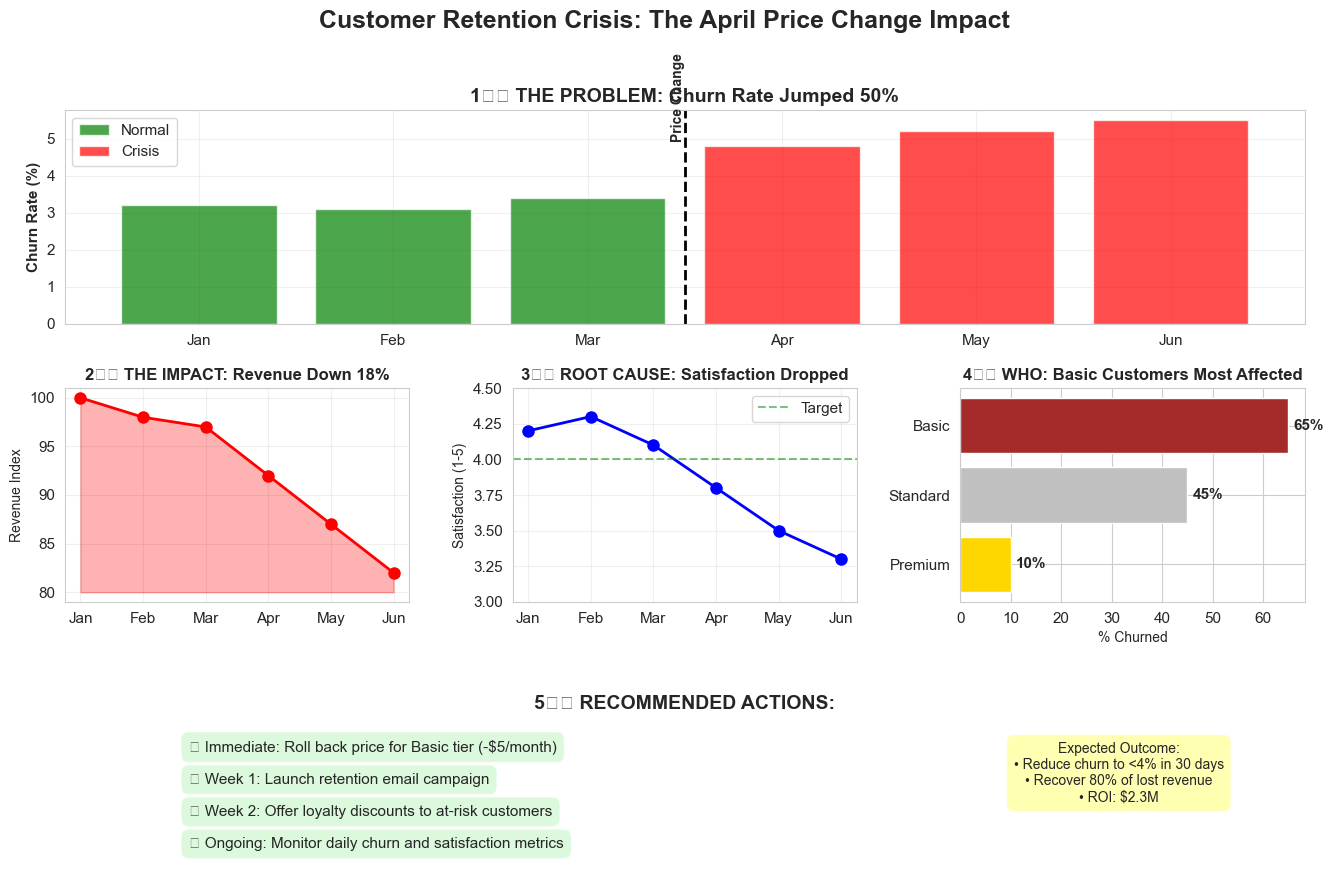


✅ Story Elements Used:
  1. Clear problem statement
  2. Quantified impact
  3. Root cause analysis
  4. Audience segmentation
  5. Actionable recommendations
  6. Expected outcomes


In [9]:
# Complete data story example
print("📖 COMPLETE DATA STORY EXAMPLE")
print("="*60)

# The Story: Customer Churn Analysis
np.random.seed(42)

# Generate realistic business data
n_customers = 1000
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun']

# Churn increased after price change in April
churn_rates = [3.2, 3.1, 3.4, 4.8, 5.2, 5.5]
revenue_impact = [100, 98, 97, 92, 87, 82]
customer_satisfaction = [4.2, 4.3, 4.1, 3.8, 3.5, 3.3]

# Create the complete story visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Title and context
fig.suptitle('Customer Retention Crisis: The April Price Change Impact', 
            fontsize=18, weight='bold', y=0.98)

# 1. The Problem (Top left - most important)
ax1 = fig.add_subplot(gs[0, :])
ax1.bar(months[:3], churn_rates[:3], color='green', alpha=0.7, label='Normal')
ax1.bar(months[3:], churn_rates[3:], color='red', alpha=0.7, label='Crisis')
ax1.axvline(x=2.5, color='black', linestyle='--', linewidth=2)
ax1.text(2.5, 5, 'Price Change', rotation=90, ha='right', fontsize=10, weight='bold')
ax1.set_title('1️⃣ THE PROBLEM: Churn Rate Jumped 50%', fontsize=14, weight='bold')
ax1.set_ylabel('Churn Rate (%)', fontsize=11, weight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# 2. The Impact
ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(months, revenue_impact, 'ro-', linewidth=2, markersize=8)
ax2.fill_between(range(len(months)), revenue_impact, 80, alpha=0.3, color='red')
ax2.set_title('2️⃣ THE IMPACT: Revenue Down 18%', fontsize=12, weight='bold')
ax2.set_ylabel('Revenue Index', fontsize=10)
ax2.grid(True, alpha=0.3)

# 3. The Root Cause
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(months, customer_satisfaction, 'bo-', linewidth=2, markersize=8)
ax3.axhline(y=4.0, color='green', linestyle='--', alpha=0.5, label='Target')
ax3.set_title('3️⃣ ROOT CAUSE: Satisfaction Dropped', fontsize=12, weight='bold')
ax3.set_ylabel('Satisfaction (1-5)', fontsize=10)
ax3.set_ylim(3, 4.5)
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. Customer Segments
ax4 = fig.add_subplot(gs[1, 2])
segments = ['Premium', 'Standard', 'Basic']
segment_impact = [10, 45, 65]  # % who churned
colors = ['gold', 'silver', 'brown']
ax4.barh(segments, segment_impact, color=colors)
ax4.set_title('4️⃣ WHO: Basic Customers Most Affected', fontsize=12, weight='bold')
ax4.set_xlabel('% Churned', fontsize=10)
for i, v in enumerate(segment_impact):
    ax4.text(v + 1, i, f'{v}%', va='center', weight='bold')

# 5. The Solution
ax5 = fig.add_subplot(gs[2, :])
recommendations = [
    '🎯 Immediate: Roll back price for Basic tier (-$5/month)',
    '📧 Week 1: Launch retention email campaign',
    '🎁 Week 2: Offer loyalty discounts to at-risk customers',
    '📊 Ongoing: Monitor daily churn and satisfaction metrics'
]
ax5.text(0.5, 0.8, '5️⃣ RECOMMENDED ACTIONS:', fontsize=14, weight='bold',
        ha='center', transform=ax5.transAxes)
for i, rec in enumerate(recommendations):
    ax5.text(0.1, 0.6 - i*0.15, rec, fontsize=11,
            transform=ax5.transAxes,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.3))
ax5.axis('off')

# Expected outcome box
outcome_text = "Expected Outcome:\n• Reduce churn to <4% in 30 days\n• Recover 80% of lost revenue\n• ROI: $2.3M"
ax5.text(0.85, 0.5, outcome_text, fontsize=10,
        transform=ax5.transAxes, ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.3))

plt.tight_layout()
plt.show()

print("\n✅ Story Elements Used:")
print("  1. Clear problem statement")
print("  2. Quantified impact")
print("  3. Root cause analysis")
print("  4. Audience segmentation")
print("  5. Actionable recommendations")
print("  6. Expected outcomes")

## Practice Exercise: Create Your Own Data Story

### 🎯 Your Turn: Build a Compelling Data Story

Use the template below to create your own data story with proper visualization and narrative structure.

In [10]:
# Practice Exercise: Create Your Data Story
print("🎯 PRACTICE: Create Your Own Data Story")
print("="*50)
print("\nYour Task:")
print("1. Choose a business scenario (sales, marketing, operations, etc.)")
print("2. Create data that shows a problem")
print("3. Build visualizations following the story structure:")
print("   - Setup/Context")
print("   - Conflict/Problem")
print("   - Resolution/Insight")
print("   - Action/Recommendation")
print("4. Apply best practices:")
print("   - Visual hierarchy")
print("   - Appropriate colors")
print("   - Clear annotations")
print("   - Audience-appropriate")
print("\nYour code here:")

# START YOUR STORY HERE
# Example structure:
"""
# Your business scenario
scenario = "..."

# Generate or load your data
# ...

# Create your visualizations
fig, axes = plt.subplots(...)

# 1. Setup/Context
# ...

# 2. Problem
# ...

# 3. Insight
# ...

# 4. Recommendation
# ...
"""

# Add your code below:


🎯 PRACTICE: Create Your Own Data Story

Your Task:
1. Choose a business scenario (sales, marketing, operations, etc.)
2. Create data that shows a problem
3. Build visualizations following the story structure:
   - Setup/Context
   - Conflict/Problem
   - Resolution/Insight
   - Action/Recommendation
4. Apply best practices:
   - Visual hierarchy
   - Appropriate colors
   - Clear annotations
   - Audience-appropriate

Your code here:


'\n# Your business scenario\nscenario = "..."\n\n# Generate or load your data\n# ...\n\n# Create your visualizations\nfig, axes = plt.subplots(...)\n\n# 1. Setup/Context\n# ...\n\n# 2. Problem\n# ...\n\n# 3. Insight\n# ...\n\n# 4. Recommendation\n# ...\n'

## Summary

### 📚 Key Takeaways from Section 4:

1. **Data Storytelling Structure**
   - Setup → Conflict → Resolution → Action
   - Focus on business impact, not just statistics

2. **Know Your Audience**
   - Executives: Business impact, ROI
   - Technical: Methodology, details
   - Operations: Implementation steps

3. **Visual Best Practices**
   - Visual hierarchy guides attention
   - Choose appropriate chart types
   - Use color purposefully (5-7 max)
   - Ensure accessibility

4. **Annotation & Context**
   - Clear titles and labels
   - Include units and sources
   - Highlight key insights
   - Provide interpretation

5. **Dashboard Design**
   - 5-second rule for main message
   - F-pattern layout
   - Progressive disclosure
   - Mobile responsive

6. **Ethical Visualization**
   - Start axes at zero
   - Show complete context
   - Avoid cherry-picking
   - Distinguish correlation from causation

### 💡 Remember:
- **Great analysis + Poor communication = No impact**
- **Focus on the "So what?" not just the "What"**
- **Make it easy for your audience to take action**
- **Test your visualizations with actual users**

---
**End of Section 4: Communication & Storytelling**

Next: Section 5 - Professional Practice & Mastery